# IMPORT

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import math

# METHOD

### Euclidean Distance(For Numpy Array)

In [6]:
def np_euclidean(e1,e2):
    return math.sqrt(math.fsum(list(map(lambda x: x**2 ,e1-e2))))

### DTW

In [7]:
def dtw_distance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

### Generate Data and Results for each File

In [8]:
def read_all_lines(file) :
    with open(file, 'rt') as fd:
        convert = [e.split() for e in fd.readlines()]
        all_data = []
        all_results = []
        for line in convert:
            data = line
            result = data.pop(-1)
            all_data.append(data)
            all_results.append(result)
            
        float_data = []
        for element in all_data:
            float_data.append([float(e) for e in element])
        float_data = np.array(float_data)
        all_results = np.array(all_results)
        
        normalized_data = []
        for element in float_data:
            mean = math.fsum(element)/len(element)
            std = math.sqrt(sum((element-mean)**2)/(len(element)-1))
            normalized_data.append((element - mean)/std)
        normalized_data = np.array(normalized_data)
        return normalized_data, all_results

### Calculate F1 Score

In [9]:
def score_eu(test_data,test_results,mrcp_avg,noise_avg):
    e_results = list()
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for each_test_data in test_data:
        e_class = None
        min_dist = float('inf')
        for avg in mrcp_avg:
            dist = np_euclidean(each_test_data, avg) 
            if dist < min_dist:
                min_dist = dist
                e_class = 'MRCP'
        for avg in noise_avg:
            dist = np_euclidean(each_test_data, avg) 
            if dist < min_dist:
                min_dist = dist
                e_class = 'Noise'
        e_results.append(e_class)
    e_results = np.array(e_results)
    for i in range(len(test_data)):
        if e_results[i] == 'MRCP' and test_results[i] == 'MRCP' :
            TP += 1
        elif e_results[i] == 'MRCP' and test_results[i] == 'Noise' :
            FP += 1
        elif e_results[i] == 'Noise' and test_results[i] == 'MRCP' :
            FN += 1
        elif e_results[i] == 'Noise' and test_results[i] == 'Noise' :
            TN += 1
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    accuracy = (TP+TN)/(TP+TN+FP+FN)*100
    f1_score = (2*precision*recall)/(precision+recall)*100
    return accuracy,f1_score

def score_dtw(test_data,test_results,mrcp_avg,noise_avg):
    e_results = list()
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for each_test_data in test_data:
        e_class = None
        min_dist = float('inf')
        for avg in mrcp_avg:
            dist = dtw_distance(each_test_data, avg) 
            if dist < min_dist:
                min_dist = dist
                e_class = 'MRCP'
        for avg in noise_avg:
            dist = dtw_distance(each_test_data, avg) 
            if dist < min_dist:
                min_dist = dist
                e_class = 'Noise'
        e_results.append(e_class)
    e_results = np.array(e_results)
    for i in range(len(test_data)):
        if e_results[i] == 'MRCP' and test_results[i] == 'MRCP' :
            TP += 1
        elif e_results[i] == 'MRCP' and test_results[i] == 'Noise' :
            FP += 1
        elif e_results[i] == 'Noise' and test_results[i] == 'MRCP' :
            FN += 1
        elif e_results[i] == 'Noise' and test_results[i] == 'Noise' :
            TN += 1
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    accuracy = (TP+TN)/(TP+TN+FP+FN)*100
    f1_score = (2*precision*recall)/(precision+recall)*100
    return accuracy,f1_score

# 1-NN

### Euclidean

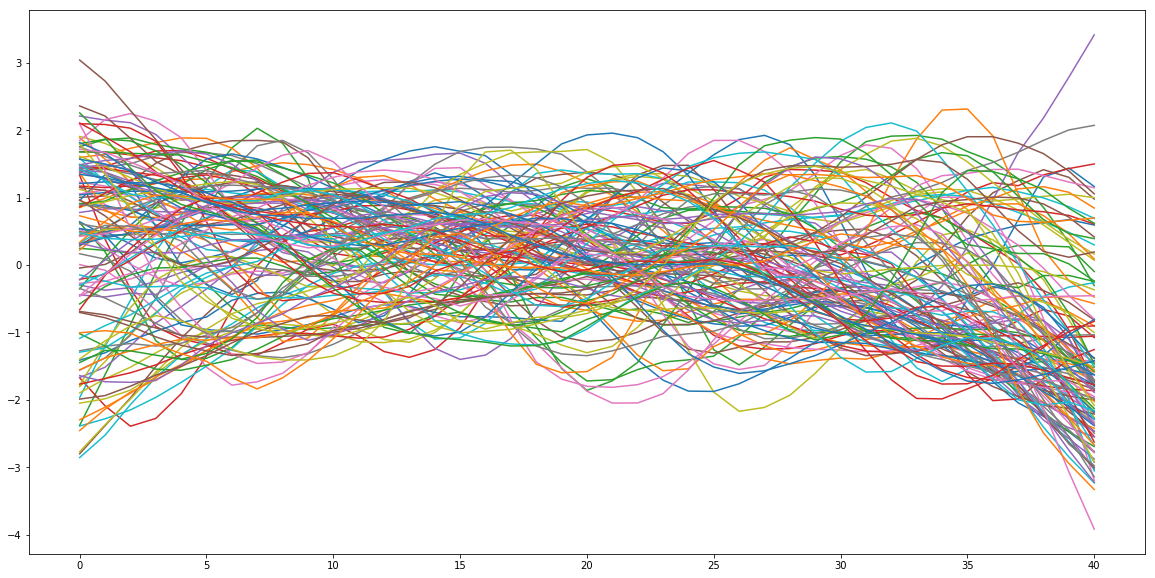

In [29]:
data , results = read_all_lines('training data/participant_'+str(1)+'.txt')

mrcp_data = list()
noise_data = list()
mrcp_result = list()
noise_result = list()

for each_data, each_result in zip(data,results):
    if each_result == 'MRCP':
        mrcp_data.append(each_data)
        mrcp_result.append(each_result)
    else:
        noise_data.append(each_data)
        noise_result.append(each_result)

mrcp_data = np.array(mrcp_data)
noise_data = np.array(noise_data)
mrcp_results = np.array(mrcp_result)
noise_results = np.array(noise_result)
plt.figure(figsize=(20,10))
for e_data in mrcp_data:
    x = range(data.shape[1])
    plt.plot(x,e_data)
plt.show()